# Lorenz attractor

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
import logging

sys.path.append("../../")
from experiments.datasets import LorenzSimulator

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)
logger = logging.getLogger(__name__)
# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "experiments" not in key and "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)
        

## Generate data

In [2]:
sim1 = LorenzSimulator(warmup=0.)
sim2 = LorenzSimulator()

In [3]:
trajectories = [sim1.trajectory(i) for i in range(100)]

17:17 experiments.datasets.lorenz    INFO    Solving Lorenz system with sigma = 10.0, beta = 2.6666666666666665, rho = 28.0, initial conditions x0 = [1.19529968 1.06969531 0.88328881], saving 1000000 time steps from 0.0 to 1000.0
17:17 experiments.datasets.lorenz    INFO    Solving Lorenz system with sigma = 10.0, beta = 2.6666666666666665, rho = 28.0, initial conditions x0 = [0.9799591  0.9581592  0.87777382], saving 1000000 time steps from 0.0 to 1000.0
17:17 experiments.datasets.lorenz    INFO    Solving Lorenz system with sigma = 10.0, beta = 2.6666666666666665, rho = 28.0, initial conditions x0 = [1.013473   0.89268983 1.08024746], saving 1000000 time steps from 0.0 to 1000.0
17:17 experiments.datasets.lorenz    INFO    Solving Lorenz system with sigma = 10.0, beta = 2.6666666666666665, rho = 28.0, initial conditions x0 = [1.05454684 1.10017542 1.22707021], saving 1000000 time steps from 0.0 to 1000.0
17:17 experiments.datasets.lorenz    INFO    Solving Lorenz system with sigma = 

In [4]:
x = sim2.sample(1000)
# x = np.load("../data/samples/lorenz/x_train.npy")[:400]
# x = np.load("../data/samples/lorenz/x_test.npy")[:400]

17:21 experiments.datasets.lorenz    INFO    Solving Lorenz system with sigma = 10.0, beta = 2.6666666666666665, rho = 28.0, initial conditions x0 = [1.19529968 1.06969531 0.88328881], saving 1000000 time steps from 50.0 to 1000.0
17:21 experiments.datasets.lorenz    INFO    Solving Lorenz system with sigma = 10.0, beta = 2.6666666666666665, rho = 28.0, initial conditions x0 = [0.9799591  0.9581592  0.87777382], saving 1000000 time steps from 50.0 to 1000.0
17:21 experiments.datasets.lorenz    INFO    Solving Lorenz system with sigma = 10.0, beta = 2.6666666666666665, rho = 28.0, initial conditions x0 = [1.013473   0.89268983 1.08024746], saving 1000000 time steps from 50.0 to 1000.0
17:21 experiments.datasets.lorenz    INFO    Solving Lorenz system with sigma = 10.0, beta = 2.6666666666666665, rho = 28.0, initial conditions x0 = [1.05454684 1.10017542 1.22707021], saving 1000000 time steps from 50.0 to 1000.0
17:21 experiments.datasets.lorenz    INFO    Solving Lorenz system with sigm

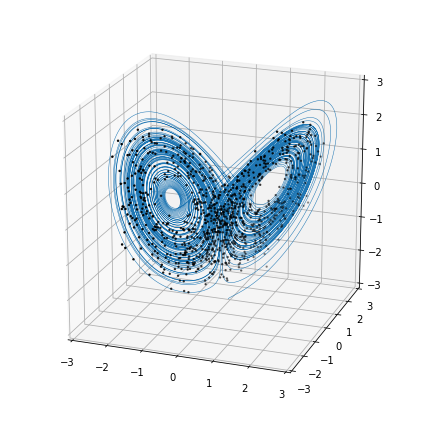

In [14]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

ax.set_xlim3d(-3, 3)
ax.set_ylim3d(-3, 3)
ax.set_zlim3d(-3, 3)

ax.view_init(elev=20, azim=-70)
for i in [0]:
    ax.plot(
        trajectories[i][:100000, 0], trajectories[i][:100000, 1], trajectories[i][:100000, 2],
        lw=0.5, alpha=1., c=f"C{i}"
    )
ax.scatter(x[:,0], x[:,1], x[:,2], c="black", s=2.)

plt.tight_layout()
plt.savefig("../figures/lorenz_data.pdf")


In [6]:
x_ = sim2.sample(10000)
np.min(x), np.max(x)

(-2.6744442526701784, 2.5960956160296718)